# Surprise Housing Assignment

### Importing the libraries

In [1]:
import numpy as np # Math Functions
import pandas as pd #Data managment and processing 
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns #Data visualization 
import plotly.express as px # Advanced Data visualization 
import warnings # Avoid warings that might arrise from data visualization
warnings.filterwarnings('ignore')
import datetime # For time line analisys
import random

### Importing the data from the csv file provided

In [2]:
housing_df= pd.read_csv("Data/train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 81)
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### EDA and Cleaning the data 

In [4]:
# lets check the columsn and if we have any missing values
housing_df.info(verbose = True, show_counts=True,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

From the data distionary we know that NA stands for not available and not missing value.
so we do not need to alter the data for columns that are object Type

Since we have the value for only 0.5% data for PoolQC we can drop it 

In [5]:
housing_df.drop(["PoolQC","PoolArea"],axis=1,inplace=True)

In [6]:
housing_df["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [7]:
# since we have only a few values in MiscFeature we can change them into a shed yes/no and drop the other data 
housing_df['Shed']=np.where(housing_df['MiscFeature']=='Shed',1,0)
housing_df.drop("MiscFeature",axis=1,inplace=True)

In [8]:
housing_df['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [9]:
#Filling Null values
null_fill=["GarageType","Alley","Fence","FireplaceQu","BsmtFinType1","BsmtFinType2","BsmtQual","BsmtCond","BsmtExposure","GarageFinish","GarageQual","GarageCond","MasVnrType"]
for x in null_fill:
    housing_df[x].fillna("No",inplace=True)

In [10]:
#Filling Electrical null values with the most common electrical system
housing_df.Electrical.fillna(housing_df.Electrical.value_counts().index[0],inplace=True)


In [11]:
# Lets see if we have any more null values left 
housing_df.columns[housing_df.isna().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [12]:
# we can fill LotFrontage with median as it is a numeric value
housing_df.LotFrontage.fillna(housing_df.LotFrontage.median(),inplace=True)

In [13]:
housing_df[housing_df.MasVnrArea.isna()].MasVnrType

234     No
529     No
650     No
936     No
973     No
977     No
1243    No
1278    No
Name: MasVnrType, dtype: object

In [14]:
# We can see that null values in MasVnrArea are all for Masonry veneer type None so we can fill it with 0
housing_df.MasVnrArea.fillna(0,inplace=True)

In [15]:
housing_df[housing_df.GarageYrBlt.isna()].GarageType.value_counts()

No    81
Name: GarageType, dtype: int64

In [16]:
# all null values are for the houses with no garage so we can fill it with 0
housing_df.GarageYrBlt.fillna(0,inplace=True)

Now the data has no null Values present in the dataframe Lets explore the data and see what we can observe 

In [17]:
def count_show(col):
    pal=["tab10","hls","husl","Set2","Paired","flare"]
    sns.countplot(col,palette=random.choice(pal))
    plt.show()

In [18]:
def hist_show(col,y=7):
    pal=["tab10","hls","husl","Set2","Paired","flare"]
    sns.histplot(col,palette=random.choice(pal),bins=y,kde=True)
    plt.show()

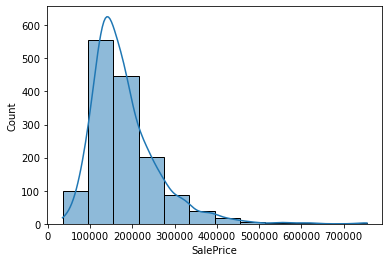

In [19]:
hist_show(housing_df.SalePrice,12)

Most of the properties sold between 10,000- 15,000

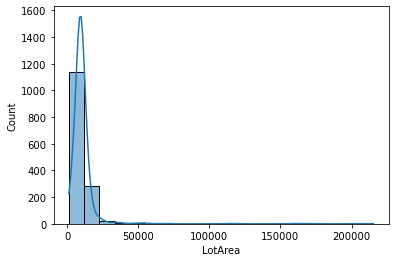

In [20]:
hist_show(housing_df.LotArea,20)

we seem to have a huge outlier in the area that neeeds to be seen more carefully 

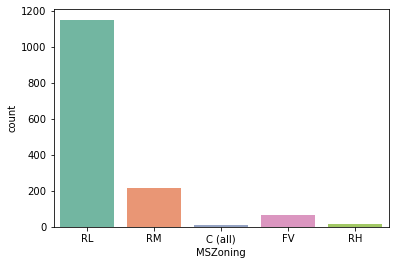

In [21]:
count_show(housing_df.MSZoning)

Majority of the properties are Residential Low Density